In [1]:
import pandas
import matplotlib.pyplot as plt



In [3]:
data = pandas.read_csv("genetics4j/samples/output.csv",)

FileNotFoundError: [Errno 2] No such file or directory: 'genetics4j/samples/output.csv'

In [4]:
data

,generation,fitness
0,0,0.267289
1,0,0.295785
2,0,0.259907
3,0,0.329641
4,0,0.274683
...,...,...
123895,412,0.899716
123896,412,0.899716
123897,412,0.899716
123898,412,0.899716


<AxesSubplot:xlabel='generation'>

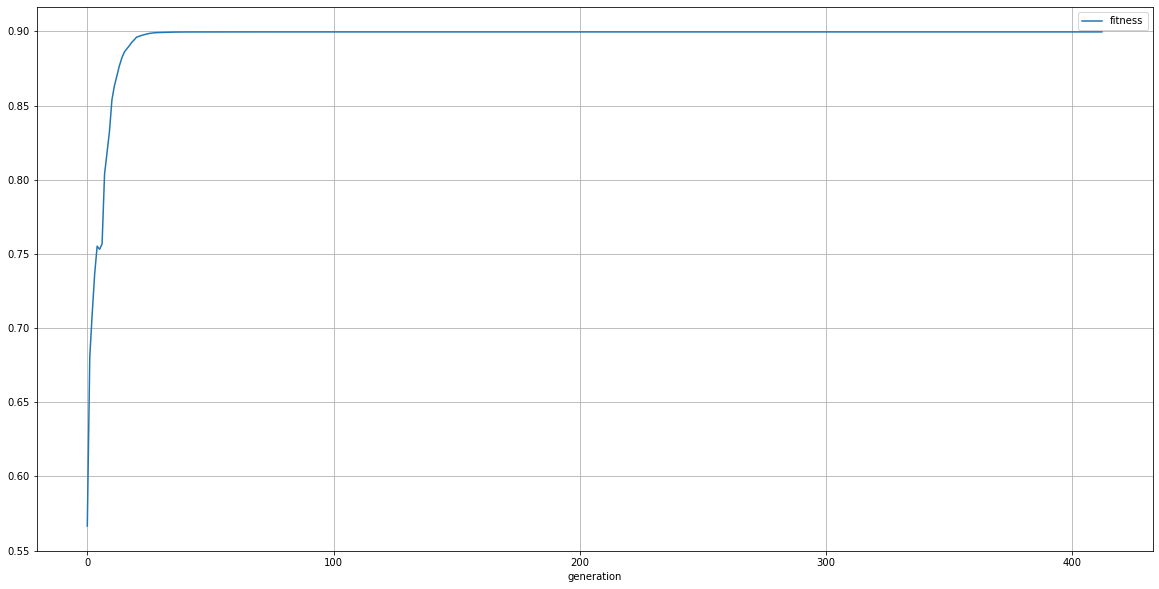

In [5]:
data.groupby("generation") \
    .quantile(0.95) \
    .plot(grid=True, figsize=(20, 10))

In [105]:
import glob, os
base_dir = "/home/bruno/projects/genetics4j/samples"
os.chdir(base_dir)

i = 0
all_data = None
for file in glob.glob("output-*.csv"):
    if i % 15 == 0:
        print("Opening {}".format(file))
    data = pandas.read_csv(base_dir + '/' + file,)
    data = data[data['generation']==500]
    data = data.nlargest(1, 'fitness')
    if all_data is None:
        all_data = data
    else:
        all_data = pandas.concat([all_data, data], axis=0)
        
    i = i+1
        
all_data

Opening output-00-00-0.csv
Opening output-00-10-5.csv
Opening output-00-20-10.csv
Opening output-00-30-15.csv
Opening output-00-40-20.csv
Opening output-00-50-25.csv
Opening output-00-60-30.csv
Opening output-00-75-0.csv
Opening output-00-85-5.csv
Opening output-00-95-10.csv
Opening output-05-05-15.csv
Opening output-05-15-20.csv
Opening output-05-25-25.csv
Opening output-05-35-30.csv
Opening output-05-50-0.csv
Opening output-05-60-5.csv
Opening output-05-70-10.csv
Opening output-05-80-15.csv
Opening output-05-90-20.csv
Opening output-10-00-25.csv
Opening output-10-10-30.csv
Opening output-10-25-0.csv
Opening output-10-35-5.csv
Opening output-10-45-10.csv
Opening output-10-55-15.csv
Opening output-10-65-20.csv
Opening output-10-75-25.csv
Opening output-10-85-30.csv
Opening output-15-00-0.csv
Opening output-15-10-5.csv
Opening output-15-20-10.csv
Opening output-15-30-15.csv
Opening output-15-40-20.csv
Opening output-15-50-25.csv
Opening output-15-60-30.csv
Opening output-15-75-0.csv
Ope

,generation,fitness,random_mutation_rate,creep_mutation_mean,creep_mutation_stddev,creep_mutation_rate
150000,500,0.850642,0.0,0.0,0.0,0.0
150000,500,0.842757,0.0,0.0,5.0,0.0
150000,500,0.801971,0.0,0.0,10.0,0.0
150000,500,0.834440,0.0,0.0,15.0,0.0
150000,500,0.839601,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...
150154,500,0.869193,0.9,0.0,10.0,0.9
150158,500,0.869127,0.9,0.0,15.0,0.9
150016,500,0.869153,0.9,0.0,20.0,0.9
150135,500,0.869122,0.9,0.0,25.0,0.9


In [106]:
all_data.tail()

,generation,fitness,random_mutation_rate,creep_mutation_mean,creep_mutation_stddev,creep_mutation_rate
150154,500,0.869193,0.9,0.0,10.0,0.9
150158,500,0.869127,0.9,0.0,15.0,0.9
150016,500,0.869153,0.9,0.0,20.0,0.9
150135,500,0.869122,0.9,0.0,25.0,0.9
150003,500,0.868981,0.9,0.0,30.0,0.9


In [107]:
all_data['fitness_100'] = all_data['fitness'] * 100
all_data['random_mutation_rate_100'] = all_data['random_mutation_rate'] * 100
all_data['creep_mutation_rate_100'] = all_data['creep_mutation_rate'] * 100

#del all_data['quality']
all_data['quality'] = "Other"
step = 1.0
for i in range(5, 101, 1):
    higher_b = i / 100.
    lower_b = (i-step) / 100.
    all_data.loc[(all_data['fitness'] < higher_b) & (all_data['fitness'] >= lower_b), 'quality'] = "{:.2f} <= quality < {:.2f}".format(lower_b, higher_b)


In [108]:
all_data_last = all_data[all_data["generation"] == 500]
all_data_last = all_data_last[all_data_last['creep_mutation_rate_100'] % 10 == 0]
all_data_last = all_data_last[all_data_last['random_mutation_rate_100'] % 10 == 0]
all_data_last = all_data_last[all_data_last['creep_mutation_stddev'] % 10 == 0]

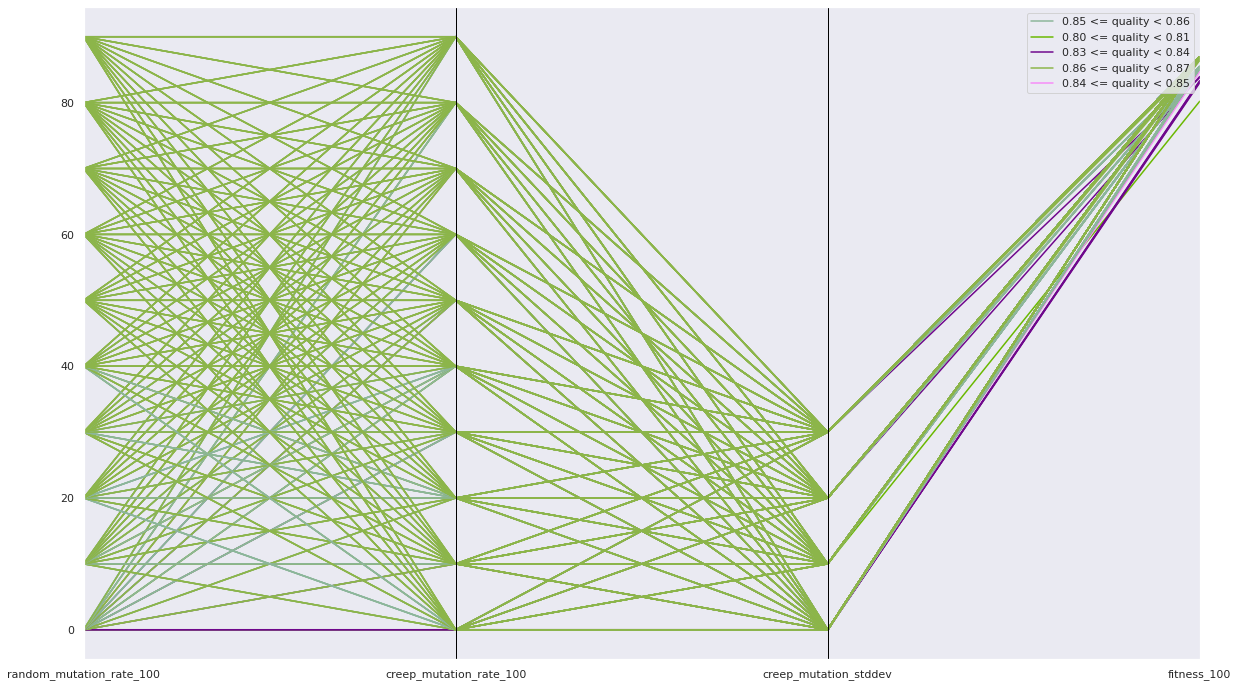

In [109]:
fig = plt.figure(figsize=(20,12))

# 'creep_mutation_mean'
pandas.plotting.parallel_coordinates(
    all_data_last,
    "quality",
    cols=['random_mutation_rate_100', 'creep_mutation_rate_100', 'creep_mutation_stddev', 'fitness_100'])
plt.show()

In [110]:
import seaborn as sns

# Apply the default theme
sns.set_theme()


<AxesSubplot:>

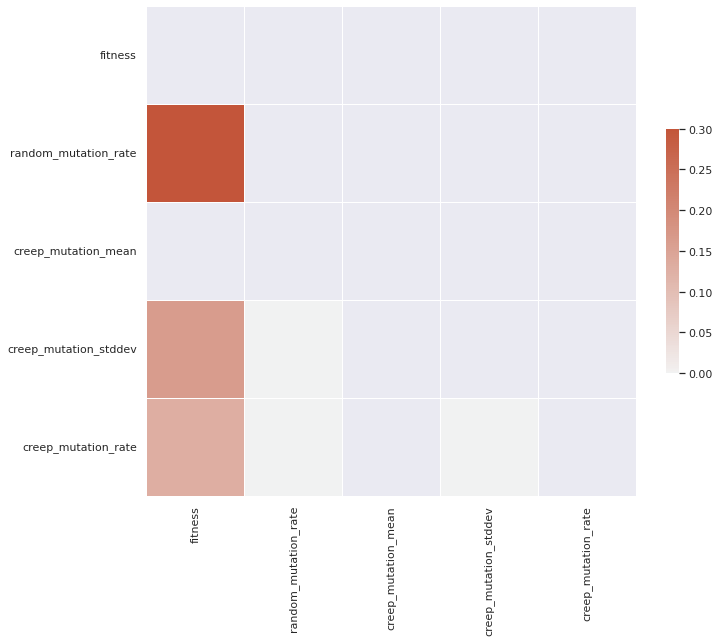

In [111]:
import numpy as np
corr = all_data_last[['fitness','random_mutation_rate','creep_mutation_mean','creep_mutation_stddev','creep_mutation_rate']].corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

0.80 <= quality < 0.81
0.83 <= quality < 0.84
0.84 <= quality < 0.85
0.85 <= quality < 0.86
0.86 <= quality < 0.87


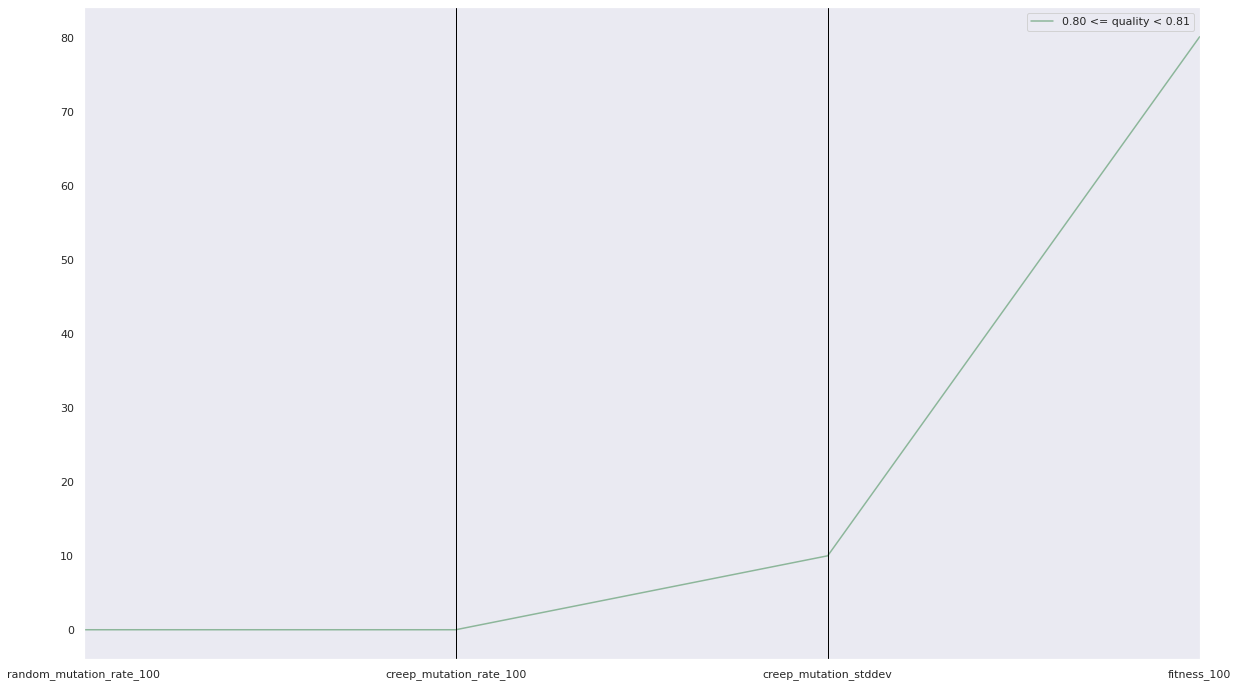

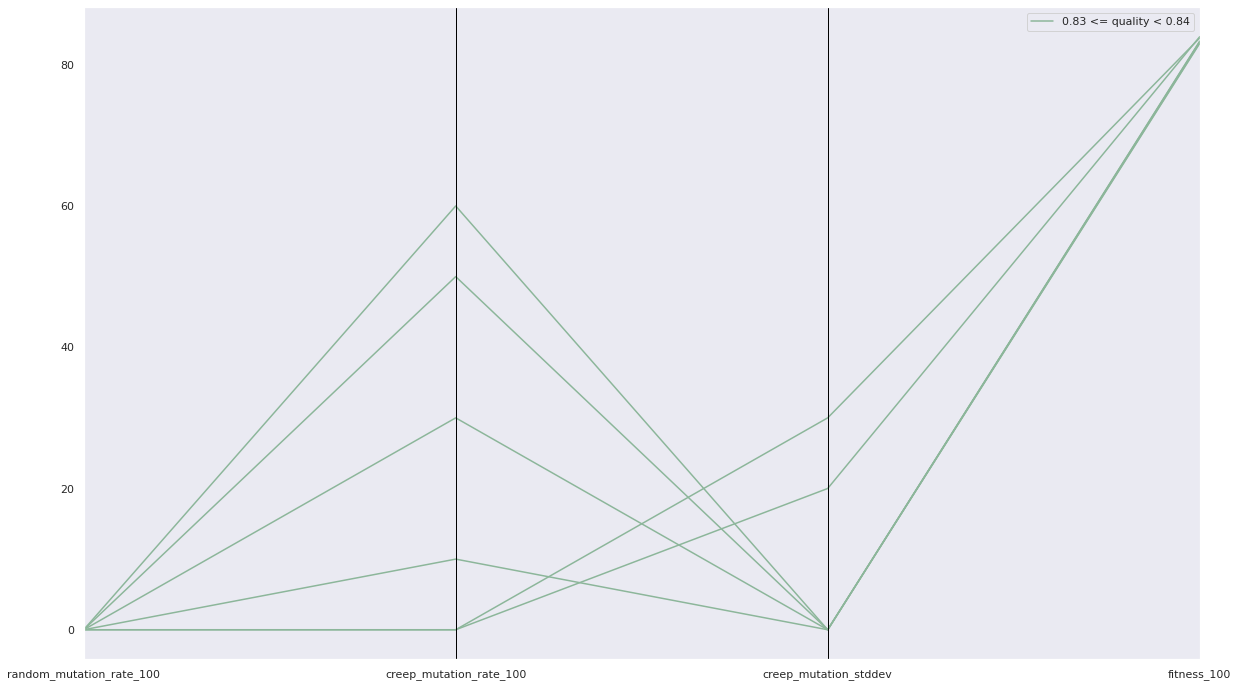

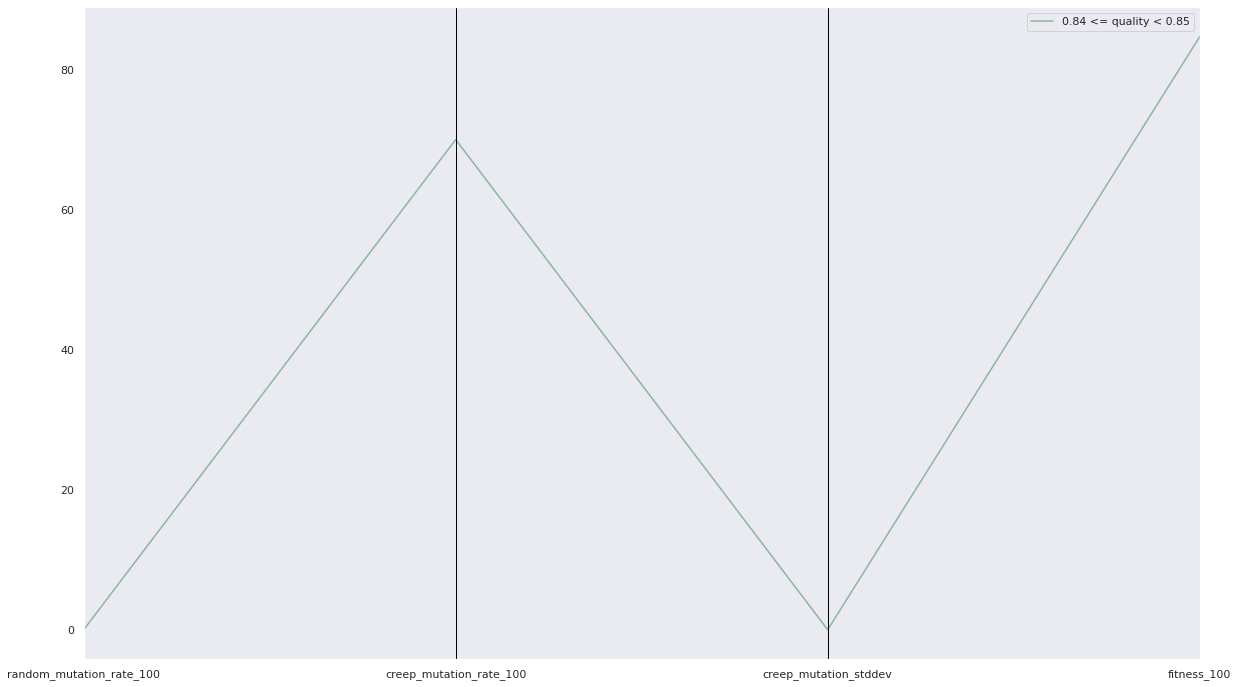

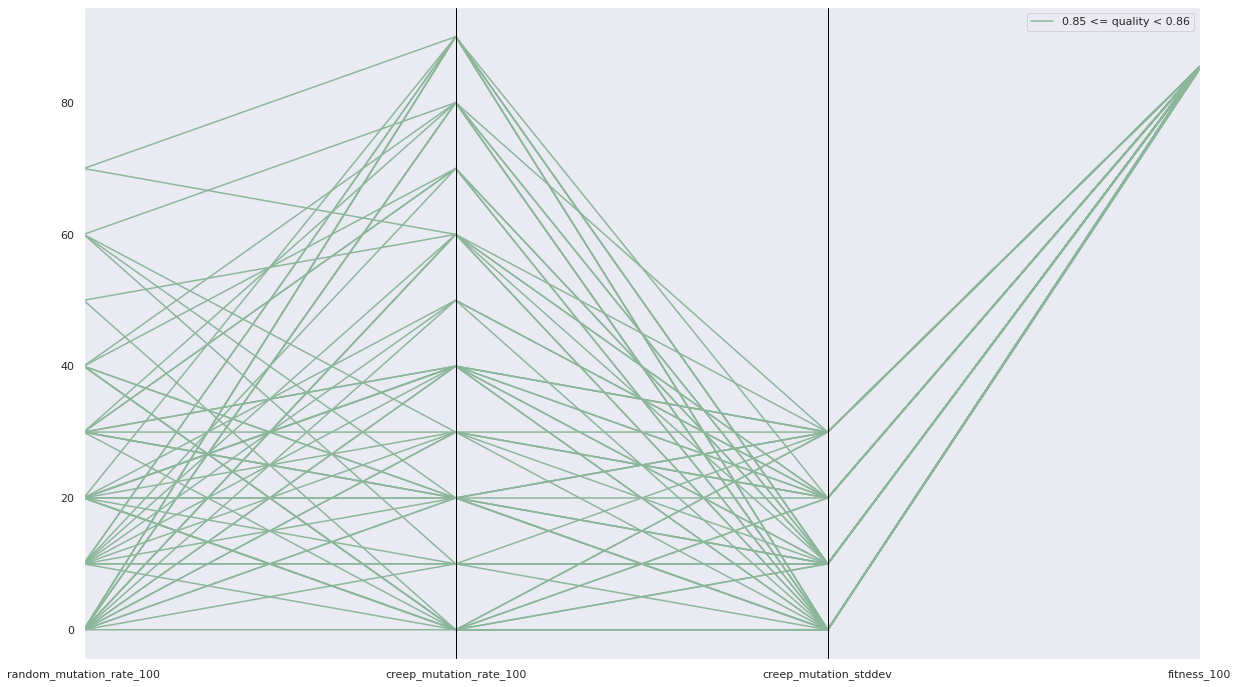

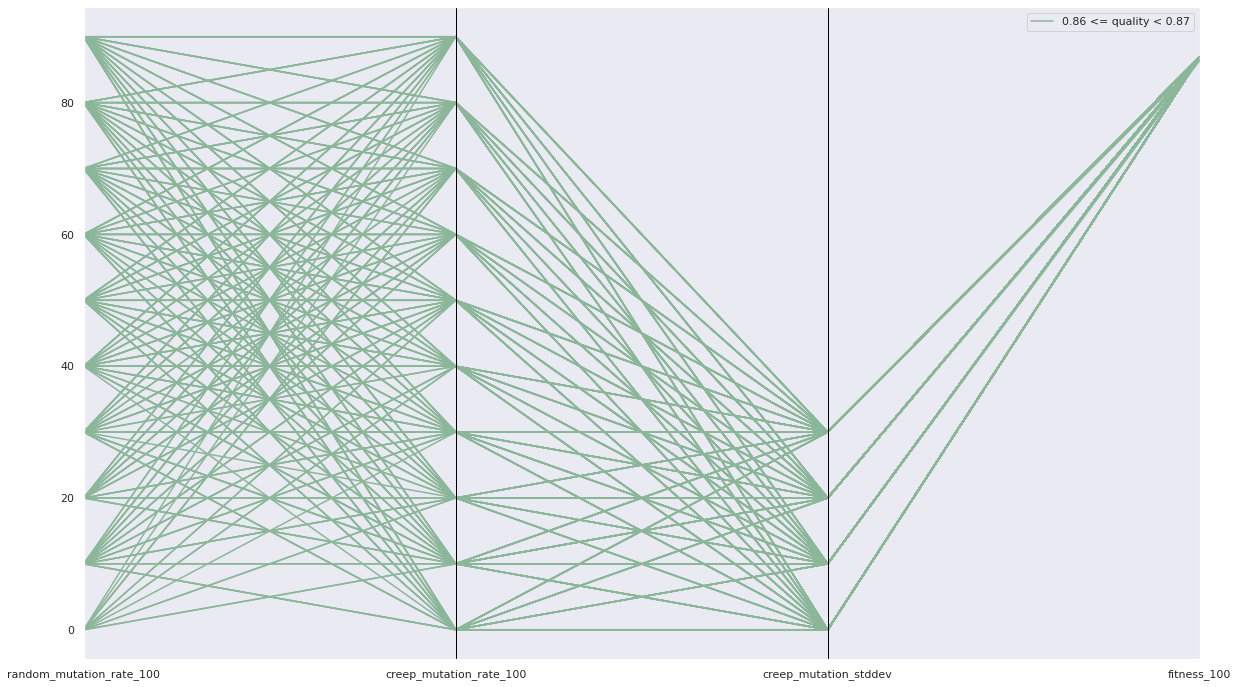

In [112]:
for quality in sorted(all_data_last['quality'].unique()):
    print(quality)
    fig = plt.figure(figsize=(20,12))

    # 'creep_mutation_mean'
    pandas.plotting.parallel_coordinates(
        all_data_last[all_data_last['quality'] == quality],
        "quality",
        cols=['random_mutation_rate_100', 'creep_mutation_rate_100', 'creep_mutation_stddev', 'fitness_100'])
    
plt.show()